### Project 1: Sales Data Analysis with Bar and Pie Charts
#### Objective: Visualize total sales per product category using a bar chart and the market share of each category using a pie chart. 

##### Step 1: Import Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt


##### Step 2: Create the DataFrame

In [67]:
data = {
    'Category': ['Electronics', 'Clothing', 'Groceries', 'Toys',
                 'Electronics', 'Clothing', 'Toys', 'Groceries'],
    'Sales': [35000, 25000, 40000, 15000, 20000, 30000, 10000, 25000]
}
df = pd.DataFrame(data)
print(df)

# pd.DataFrame(data) - converts the dictionary into a table-like DataFrame.

      Category  Sales
0  Electronics  35000
1     Clothing  25000
2    Groceries  40000
3         Toys  15000
4  Electronics  20000
5     Clothing  30000
6         Toys  10000
7    Groceries  25000


##### Step 3: Aggregate Sales by Category

In [68]:
total_sales = df.groupby('Category')['Sales'].sum()
print(total_sales)

# groupby('Category') - groups data by Category
# ['Sales'].sum() - sums up Sales for each category

Category
Clothing       55000
Electronics    55000
Groceries      65000
Toys           25000
Name: Sales, dtype: int64


##### Step 4: Create Subplots (1 row, 2 columns), Bar Chart, Pie Chart

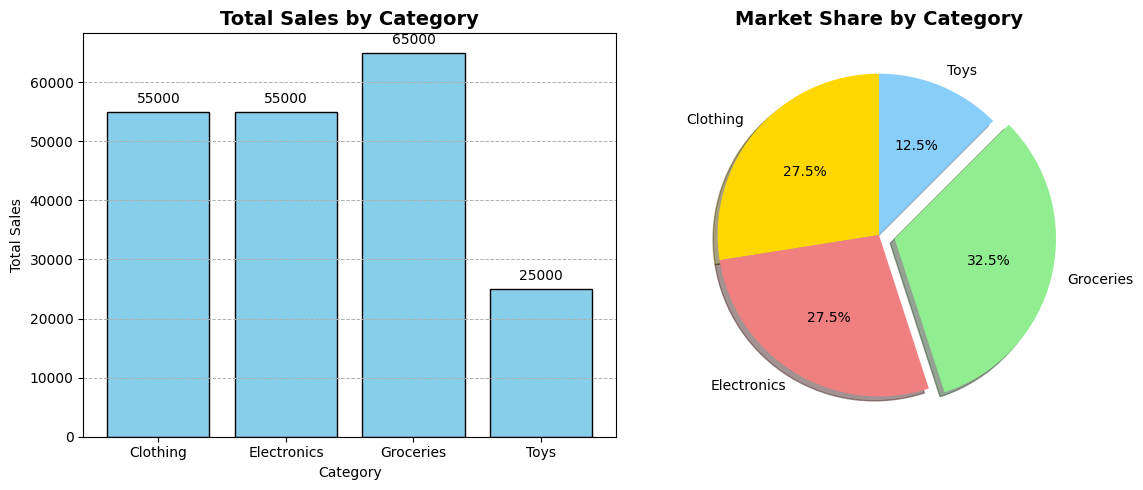

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# plt.subplots(1, 2) → creates 1 row and 2 columns of plots (side-by-side).
# figsize=(12, 5) → sets the size of the figure (width=12, height=5).

# --------------------------- Bar Chart on first subplot-----------------------------------

axes[0].bar(total_sales.index, total_sales.values, color='skyblue', edgecolor='black')
axes[0].set_title('Total Sales by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')
axes[0].grid(axis='y', linestyle='--', linewidth=0.7)

# axes[0] - first subplot (bar chart)
# axes[0].bar(...) - creates a bar chart on the first subplot.
# total_sales.index - x-axis labels (categories).
# total_sales.values - y-axis values (total sales).
# grid(axis='y') - adds horizontal grid lines for easy reading.

# ----------------------------Add value labels on bars--------------------------------------

for i, value in enumerate(total_sales.values):
    axes[0].text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=10)

#  enumerate - built in function, loop over a list (or any iterable) and get both the index and the value at the same time.
# i -x-coordinate - the position of the bar
# value + 1000 - y-coordinate → slightly above the top of the bar
# str(value)- the label → convert number to string
# ha='center' - horizontally center the text over the bar
# va='bottom' - align text vertically from the bottom (so it sits above the bar)


# ----------------------------- Pie Chart on second subplot-----------------------------------

explode = [0.1 if val == total_sales.max() else 0 for val in total_sales.values]  # highlight top category
axes[1].pie(
    total_sales.values,
    labels=total_sales.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue'],
    explode=explode,
    shadow=True
)
axes[1].set_title('Market Share by Category', fontsize=14, fontweight='bold')

# axes[1] - second subplot (pie chart)
# axes[1].pie(...) - creates a pie chart on the second subplot.
# total_sales.values - values for each slice.
# labels=total_sales.index - labels for each slice.
# autopct='%1.1f%%' - shows percentage on each slice.
# startangle=90 - starts from right angle
# explode -Default is 0, which means the slice stays in the circle,
# a value like 0.1 moves that slice slightly outward for emphasis.
# If it equals the maximum value - 0.1 (slice is pulled out), Otherwise - 0 (slice stays in)

# ------------------Adjust layout and show charts----------------------------------

plt.tight_layout() # fixes spacing between subplots
plt.show()

